In [1]:
import jaxley as jx
import jax.numpy as jnp
import numpy as np

cell = jx.read_swc("morphology/point.swc", ncomp=1, assign_groups=True)
cell.xyzr
cell.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param,soma,custom
0,0,0,0,0.1,10.0,5000.0,1.0,-70.0,0,0,0,0,False,True
1,0,1,0,10.0,10.0,5000.0,1.0,-70.0,0,1,1,0,True,False
2,0,2,0,10.0,10.0,5000.0,1.0,-70.0,0,2,2,0,True,False


In [2]:
duration = 1000
dt = 0.025

In [3]:
current = jx.step_current(i_delay=100, i_dur=800, i_amp=0.1, delta_t=dt, t_max=duration)
cell[0].loc(0.5).stimulate(current)

Added 1 external_states. See `.externals` for details.


In [4]:
cell[0].loc(0.5).record('v')

Added 1 recordings. See `.recordings` for details.


In [5]:
vs = jnp.squeeze(
            jx.integrate(
                module=cell, 
                params=[],
                param_state=None,
                voltage_solver='jax.sparse',
                delta_t=dt,
                t_max=duration
            ).block_until_ready()
        )
t = np.arange(0, duration + 2*dt, dt)[:-1]

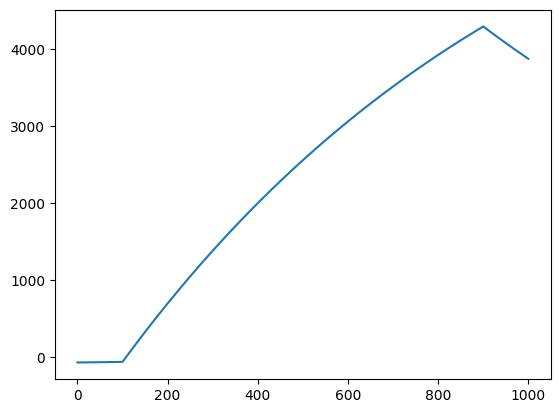

In [7]:
import matplotlib.pyplot as plt
plt.plot(t, vs)